### 2022年度計算機演習A・B

# 第7回レポート課題の解説

### 演習1

関数 $f(x)=\sqrt{x}+1$ に対して、区間 $[0,1]$ の分割数 $3$ の等分割に関する左リーマン和と右リーマン和を考えます。

それぞれに対応する図を描画した上で値を求めるコードを書いてください。

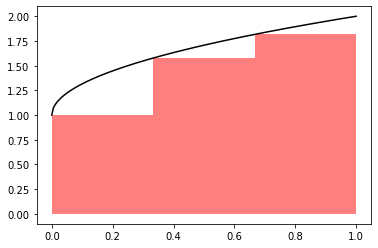

分割数3の等分割に関する左リーマン和の値は 1.4646156167057838


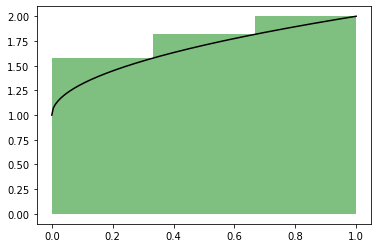

分割数3の等分割に関する右リーマン和の値は 1.797948950039117


In [1]:
import math
import matplotlib.pyplot as plt

def f(x):
    return math.sqrt(x)+1

def draw_f():
    x_list = []
    y_list = []
    for i in range(201):
        x = i/200
        x_list.append(x)
        y_list.append(f(x))
    plt.plot(x_list,y_list,"k-")

draw_f()
plt.fill([0,1/3,1/3,0],[0,0,f(0),f(0)],"r",alpha=0.5)  #長方形の頂点のx,y座標を左下、右下、右上、左上の順に並べる
plt.fill([1/3,2/3,2/3,1/3],[0,0,f(1/3),f(1/3)],"r",alpha=0.5)
plt.fill([2/3,1,1,2/3],[0,0,f(2/3),f(2/3)],"r",alpha=0.5)
plt.show()

print("分割数3の等分割に関する左リーマン和の値は",f(0)*(1/3)+f(1/3)*(1/3)+f(2/3)*(1/3))  #描画した長方形の面積（縦×横）の和を計算する

draw_f()
plt.fill([0,1/3,1/3,0],[0,0,f(1/3),f(1/3)],"g",alpha=0.5)
plt.fill([1/3,2/3,2/3,1/3],[0,0,f(2/3),f(2/3)],"g",alpha=0.5)
plt.fill([2/3,1,1,2/3],[0,0,f(1),f(1)],"g",alpha=0.5)
plt.show()

print("分割数3の等分割に関する右リーマン和の値は",f(1/3)*(1/3)+f(2/3)*(1/3)+f(1)*(1/3))

### 演習2

関数 $f(x)=\sqrt{x}+1$ に対して、区間 $[0,1]$ の分割数 $n$ の等分割に関する左リーマン和と右リーマン和を考えます。

左リーマン和に対応する図を描画する関数`draw_left_RS(n)`、左リーマン和の値を返す関数`calc_left_RS(n)`、右リーマン和に対応する図を描画する関数`draw_right_RS(n)`、右リーマン和の値を返す関数`calc_right_RS(n)`を定義してください。

$n=4$ の場合に、定義したそれぞれの関数を呼び出してください。

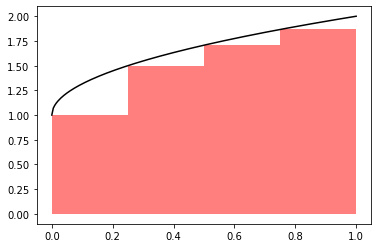

分割数 4 の等分割に関する左リーマン和の値は 1.5182830462427466


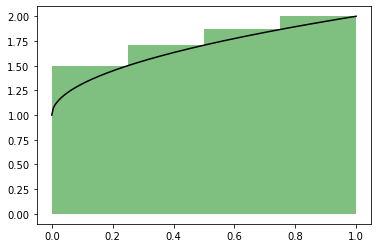

分割数 4 の等分割に関する右リーマン和の値は 1.7682830462427466


In [2]:
import math
import matplotlib.pyplot as plt

def f(x):
    return math.sqrt(x)+1

def draw_f():
    x_list = []
    y_list = []
    for i in range(201):
        x = i/200
        x_list.append(x)
        y_list.append(f(x))
    plt.plot(x_list,y_list,"k-")

def draw_left_RS(n):
    draw_f()
    for i in range(n):  #i=0からn-1まで繰り返す
        plt.fill([i/n,(i+1)/n,(i+1)/n,i/n],[0,0,f(i/n),f(i/n)],"r",alpha=0.5)  #「(i+1)/n」と「i+1/n」は違うので注意
    plt.show()

def calc_left_RS(n):
    value = 0
    for i in range(n):
        value = value+f(i/n)*(1/n)
    return value

def draw_right_RS(n):
    draw_f()
    for i in range(n):
        plt.fill([i/n,(i+1)/n,(i+1)/n,i/n],[0,0,f((i+1)/n),f((i+1)/n)],"g",alpha=0.5)
    plt.show()

def calc_right_RS(n):
    value = 0
    for i in range(n):
        value = value+f((i+1)/n)*(1/n)
    return value

n = 4
draw_left_RS(n)
print("分割数",n,"の等分割に関する左リーマン和の値は",calc_left_RS(n))
draw_right_RS(n)
print("分割数",n,"の等分割に関する右リーマン和の値は",calc_right_RS(n))

### 演習3（オプション）

関数 $f(x)=\sqrt{x}+1$ に対して、区間 $[0,1]$ の分割数 $n$ の等分割に関する左リーマン和と右リーマン和を考えます。

右リーマン和と左リーマン和の差が $0.01$ より小さくなるような最小の $n$ を求めるコードを書いてください。

また、定積分 $\int_0^1 \left(\sqrt{x}+1\right)\,dx$ の値を手計算で求め、上記の $n$ に対する左リーマン和および右リーマン和の値と比較して考察してください。

右リーマン和と左リーマン和の差が0.01より小さくなるような最小のnは 100


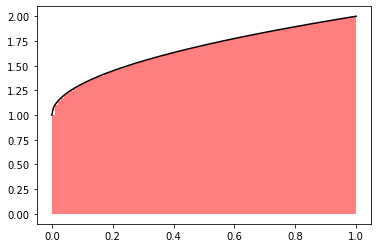

分割数 100 の等分割に関する左リーマン和の値は 1.661462947103148


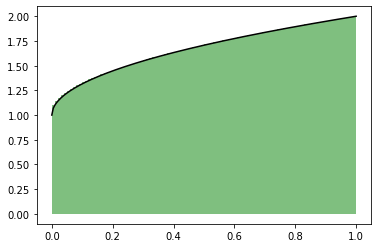

分割数 100 の等分割に関する右リーマン和の値は 1.6714629471031477


In [3]:
n = 1
while calc_right_RS(n)-calc_left_RS(n) >= 0.01:
    n = n+1

print("右リーマン和と左リーマン和の差が0.01より小さくなるような最小のnは",n)

draw_left_RS(n)
print("分割数",n,"の等分割に関する左リーマン和の値は",calc_left_RS(n))
draw_right_RS(n)
print("分割数",n,"の等分割に関する右リーマン和の値は",calc_right_RS(n))

#### （考察）

定積分の値を計算すると

$$
\int_0^1 \left(\sqrt{x}+1\right)\,dx=\left[\frac{2}{3}x^{\frac{3}{2}}+x\right]_0^1=\frac{5}{3}=1.666\cdots
$$

であるから、分割数 $100$ の等分割に関して

$$
\text{（左リーマン和）}<\int_0^1 \left(\sqrt{x}+1\right)\,dx<\text{（右リーマン和）}
$$

が成り立つことが分かる。関数 $f(x)=\sqrt{x}+1$ は単調増加なので、これは理論的な結果に一致している。

また、次のコードから分かるように、右リーマン和の方が定積分の値に近い。関数 $f(x)=\sqrt{x}+1$ は単調増加かつ上に凸なので、これは一般の $n$ についても成り立つと言える。上で描画した $n=4$ の場合の図を見ると、その理由が分かりやすい。

In [4]:
print("分割数",n,"の等分割に関する右リーマン和の値と定積分の値の差は",calc_right_RS(n)-5/3)
print("定積分の値と分割数",n,"の等分割に関する左リーマン和の値の差は",5/3-calc_left_RS(n))

分割数 100 の等分割に関する右リーマン和の値と定積分の値の差は 0.004796280436480949
定積分の値と分割数 100 の等分割に関する左リーマン和の値の差は 0.005203719563518838
